# RockSpoon - Cintia Izumi Shinoda's Test

## Variables

| Column |	Description |
|:-------|:-------------|
| name | The name of the company. |
| active_founder | Number of active founders in the startup. |
|batch | The Y Combinator batch the company participated in. |
|founded | The year the company was founded. |
|industry | The industry or sector of the company. |
|jobs | Number of available jobs in a company. |
|location | The primary location of the company. |
|logo | URL or path to the company's logo image. |
|long_description |	A detailed description of the company. |
|region	| The region where the company operates or is headquartered. |
|short_description | A brief description of the company. |
|status | The current status of the company (e.g., active, acquired, closed). |
|tags | Keywords or tags related to the company's focus or technology. |
|team_size | The current team size of the company. |
|website | The company's official website. |

## Questions:

1. What is the most invested industry by year of foundation? (Nice to have a graph)

2. What is the top 10 cities that contains the highest amount of founded companies?

3. "What are the 10 (or close to 10) most successful (status equal Public or Acquired) industries and quantity? 

4. What is the average team size of those companies?"

5. What are the most unsuccessful (status equal Archived) industries?

6. If you would pick an industry to invest, what industry would be and why? 

7. If you would pick a Company to invest, what Company would be and why? 

## 

In [1]:
# libraries import:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data loading:
df = pd.read_excel("data.xlsx", sheet_name="Data")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   active_founders    4940 non-null   object 
 1   batch              4974 non-null   object 
 2   founded            3899 non-null   float64
 3   industry           4974 non-null   object 
 4   jobs               4974 non-null   int64  
 5   location           4599 non-null   object 
 6   logo               4272 non-null   object 
 7   long_description   4625 non-null   object 
 8   name               4974 non-null   object 
 9   region             4684 non-null   object 
 10  short_description  4775 non-null   object 
 11  status             4974 non-null   object 
 12  tags               4218 non-null   object 
 13  team_size          4893 non-null   float64
 14  website            4973 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 583.0+ KB
None
       

### 1. What is the most invested industry by year of foundation?

In [3]:
from IPython.display import display

industry_by_year = df.groupby(['founded', 'industry']).size().reset_index(name="count")
industry_top = industry_by_year.sort_values("count", ascending=False)
display(industry_top.head(10))

,founded,industry,count
606,2023.0,B2B,92
608,2023.0,"B2B,Engineering, Product and Design",88
657,2024.0,"B2B,Engineering, Product and Design",64
505,2021.0,"B2B,Engineering, Product and Design",55
555,2022.0,B2B,53
654,2024.0,B2B,50
557,2022.0,"B2B,Engineering, Product and Design",49
503,2021.0,B2B,49
449,2020.0,"B2B,Engineering, Product and Design",45
528,2021.0,Fintech,44


In [4]:
# the least:
display(industry_top.tail(10))

,founded,industry,count
170,2014.0,"Fintech,Asset Management",1
168,2014.0,"Consumer,Travel, Leisure and Tourism",1
164,2014.0,"Consumer,Food and Beverage",1
163,2014.0,"Consumer,Consumer Electronics",1
162,2014.0,"Consumer,Apparel and Cosmetics",1
156,2014.0,"B2B,Operations",1
511,2021.0,"B2B,Office Management",1
154,2014.0,"B2B,Legal",1
147,2013.0,Unspecified,1
0,2005.0,B2B,1


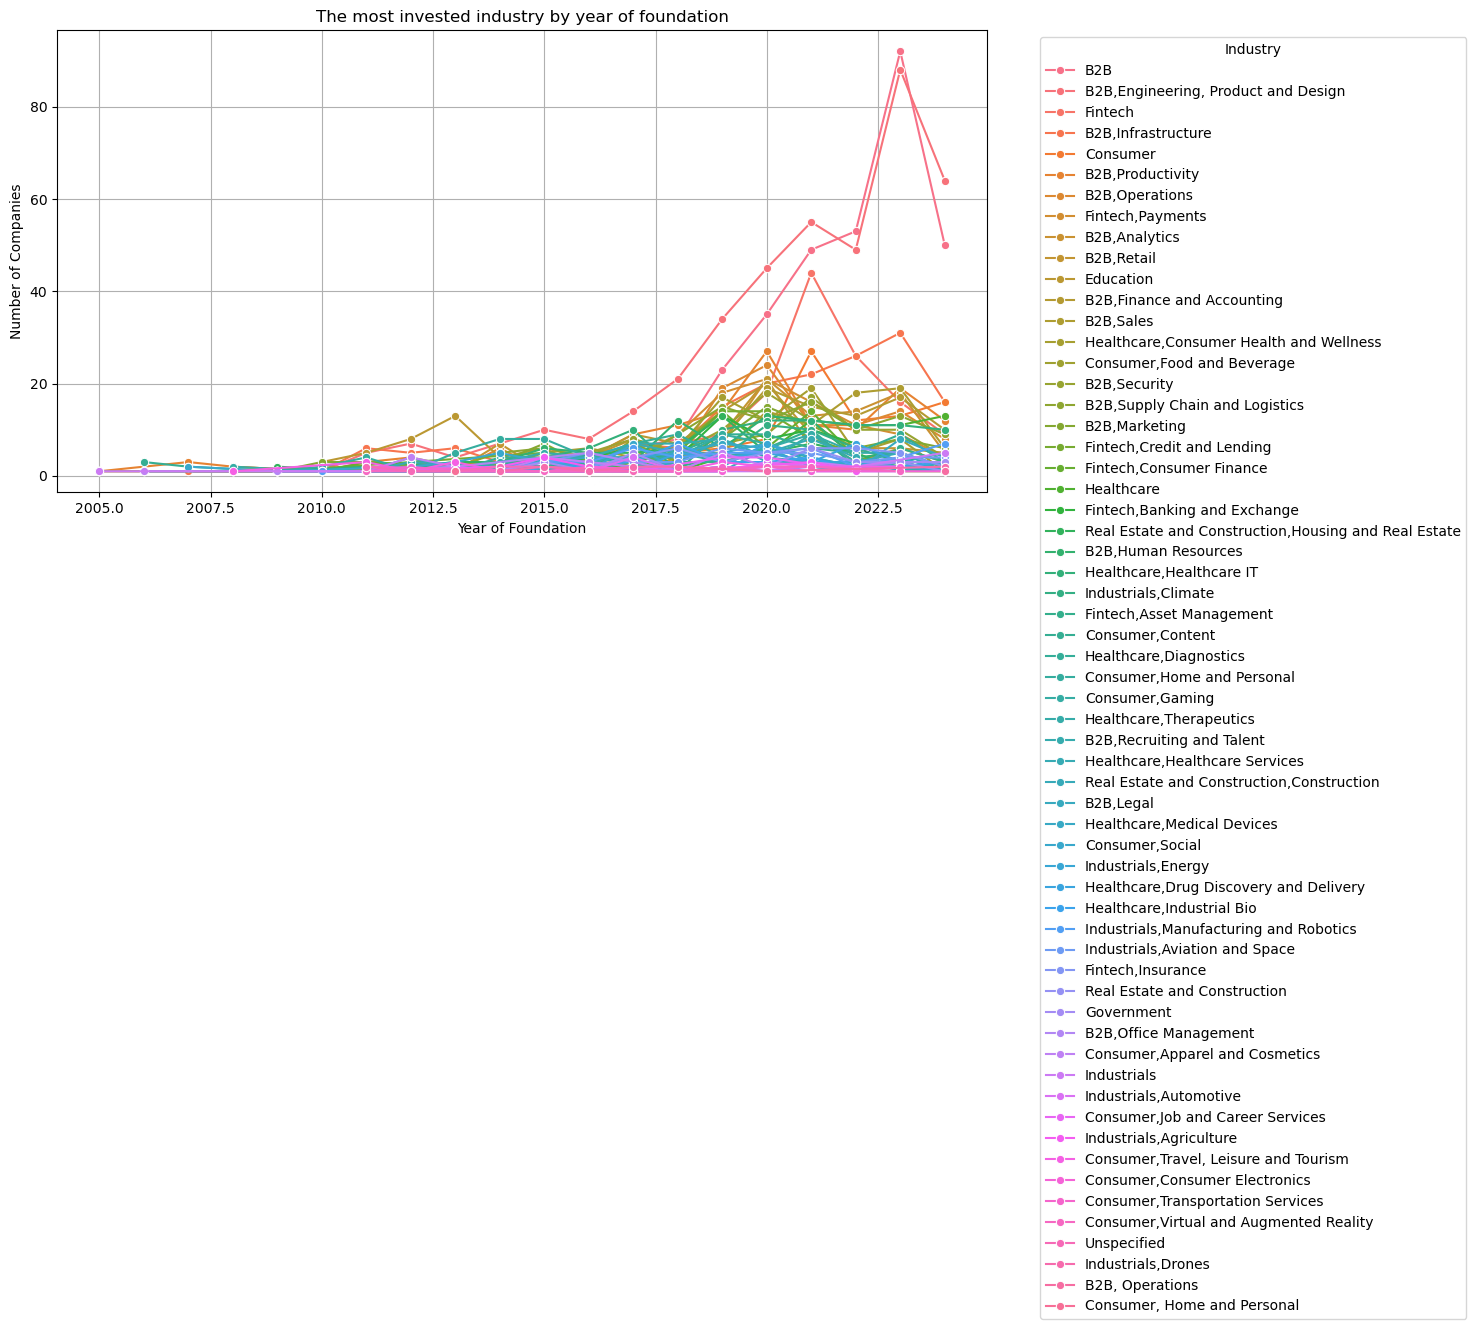

In [5]:
# Graph

plt.figure(figsize=(12, 6))
sns.lineplot(data=industry_top, x="founded", y="count", hue="industry", marker="o")

plt.xlabel("Year of Foundation")
plt.ylabel("Number of Companies")
plt.title("The most invested industry by year of foundation")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.show()

In [6]:
# Years in the dataset:
unique_years_sorted = sorted(df["founded"].dropna().unique())
print(unique_years_sorted)

[2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0]


In [7]:
# Industries in the dataset:
unique_industries = df["industry"].dropna().unique()
num_unique_industries = df["industry"].nunique()

print("Unique industries: ", unique_industries)
print("Number of unique industries: ", num_unique_industries)

Unique industries:  ['Industrials,Aviation and Space' 'B2B,Infrastructure' 'Government'
 'Healthcare,Healthcare IT' 'B2B,Engineering, Product and Design'
 'Healthcare' 'Consumer' 'B2B' 'B2B,Operations'
 'B2B,Finance and Accounting' 'B2B,Sales' 'B2B,Recruiting and Talent'
 'Fintech,Payments' 'B2B,Marketing' 'Fintech' 'Consumer,Social'
 'Consumer,Content' 'Industrials,Automotive' 'B2B,Security'
 'Real Estate and Construction,Construction'
 'Industrials,Manufacturing and Robotics' 'B2B,Retail'
 'Fintech,Consumer Finance'
 'Real Estate and Construction,Housing and Real Estate'
 'B2B,Human Resources' 'Healthcare,Industrial Bio'
 'Healthcare,Therapeutics' 'Healthcare,Drug Discovery and Delivery'
 'B2B,Supply Chain and Logistics' 'B2B,Productivity' 'Industrials,Drones'
 'Education' 'Fintech,Insurance' 'Fintech,Asset Management'
 'Healthcare,Consumer Health and Wellness' 'Industrials,Climate'
 'Industrials,Energy' 'B2B,Analytics' 'B2B,Office Management' 'B2B,Legal'
 'Industrials' 'Consumer,Gam

#### Year by year

I chose to focus on the data from 2017 as, visually, the data showed a more significant change in pattern.

In [8]:
# 2017
founded_2017 = df[df["founded"] == 2017]
industry_by_year_2017 = founded_2017.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2017 = industry_by_year_2017.sort_values("count", ascending=False).head(10)
print(industry_top_2017)

    founded                             industry  count
2    2017.0  B2B,Engineering, Product and Design     14
37   2017.0             Healthcare,Healthcare IT     10
9    2017.0                     B2B,Productivity      9
24   2017.0                            Education      9
17   2017.0           Consumer,Food and Beverage      8
11   2017.0                           B2B,Retail      8
13   2017.0                         B2B,Security      8
21   2017.0                      Consumer,Social      7
38   2017.0       Healthcare,Healthcare Services      7
5    2017.0                   B2B,Infrastructure      7


In [9]:
# 2018
founded_2018 = df[df["founded"] == 2018]
industry_by_year_2018 = founded_2018.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2018 = industry_by_year_2018.sort_values("count", ascending=False).head(10)
print(industry_top_2018)

    founded                             industry  count
2    2018.0  B2B,Engineering, Product and Design     21
4    2018.0                  B2B,Human Resources     12
10   2018.0                     B2B,Productivity     11
38   2018.0               Healthcare,Diagnostics      9
34   2018.0                     Fintech,Payments      9
15   2018.0       B2B,Supply Chain and Logistics      9
0    2018.0                                  B2B      8
42   2018.0            Healthcare,Industrial Bio      7
28   2018.0                              Fintech      7
11   2018.0            B2B,Recruiting and Talent      7


In [10]:
# 2019
founded_2019 = df[df["founded"] == 2019]
industry_by_year_2019 = founded_2019.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2019 = industry_by_year_2019.sort_values("count", ascending=False).head(10)
print(industry_top_2019)

    founded                                 industry  count
2    2019.0      B2B,Engineering, Product and Design     34
0    2019.0                                      B2B     23
9    2019.0                           B2B,Operations     19
34   2019.0                         Fintech,Payments     18
37   2019.0  Healthcare,Consumer Health and Wellness     17
15   2019.0           B2B,Supply Chain and Logistics     15
5    2019.0                       B2B,Infrastructure     15
32   2019.0               Fintech,Credit and Lending     14
31   2019.0                 Fintech,Consumer Finance     14
10   2019.0                         B2B,Productivity     14


In [11]:
# 2020
founded_2020 = df[df["founded"] == 2020]
industry_by_year_2020 = founded_2020.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2020 = industry_by_year_2020.sort_values("count", ascending=False).head(10)
print(industry_top_2020)

    founded                             industry  count
2    2020.0  B2B,Engineering, Product and Design     45
0    2020.0                                  B2B     35
10   2020.0                     B2B,Productivity     27
9    2020.0                       B2B,Operations     24
35   2020.0                     Fintech,Payments     21
1    2020.0                        B2B,Analytics     21
12   2020.0                           B2B,Retail     21
28   2020.0                            Education     20
5    2020.0                   B2B,Infrastructure     20
3    2020.0           B2B,Finance and Accounting     19


In [12]:
# 2021
founded_2021 = df[df["founded"] == 2021]
industry_by_year_2021 = founded_2021.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2021 = industry_by_year_2021.sort_values("count", ascending=False).head(10)
print(industry_top_2021)

    founded                                 industry  count
2    2021.0      B2B,Engineering, Product and Design     55
0    2021.0                                      B2B     49
25   2021.0                                  Fintech     44
15   2021.0                                 Consumer     27
5    2021.0                       B2B,Infrastructure     22
34   2021.0  Healthcare,Consumer Health and Wellness     19
13   2021.0                             B2B,Security     17
14   2021.0           B2B,Supply Chain and Logistics     16
31   2021.0                         Fintech,Payments     16
3    2021.0               B2B,Finance and Accounting     15


In [13]:
# 2022
founded_2022 = df[df["founded"] == 2022]
industry_by_year_2022 = founded_2022.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2022 = industry_by_year_2022.sort_values("count", ascending=False).head(10)
print(industry_top_2022)

    founded                             industry  count
0    2022.0                                  B2B     53
2    2022.0  B2B,Engineering, Product and Design     49
5    2022.0                   B2B,Infrastructure     26
25   2022.0                              Fintech     26
13   2022.0                            B2B,Sales     18
1    2022.0                        B2B,Analytics     14
3    2022.0           B2B,Finance and Accounting     13
16   2022.0                             Consumer     12
31   2022.0                     Fintech,Payments     11
33   2022.0                           Healthcare     11


In [14]:
# 2023
founded_2023 = df[df["founded"] == 2023]
industry_by_year_2023 = founded_2023.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2023 = industry_by_year_2023.sort_values("count", ascending=False).head(10)
print(industry_top_2023)

    founded                             industry  count
0    2023.0                                  B2B     92
2    2023.0  B2B,Engineering, Product and Design     88
5    2023.0                   B2B,Infrastructure     31
13   2023.0                            B2B,Sales     19
10   2023.0                     B2B,Productivity     19
1    2023.0                        B2B,Analytics     18
3    2023.0           B2B,Finance and Accounting     17
25   2023.0                              Fintech     16
9    2023.0                       B2B,Operations     14
15   2023.0       B2B,Supply Chain and Logistics     13


In [15]:
# 2024
founded_2024 = df[df["founded"] == 2024]
industry_by_year_2024 = founded_2024.groupby(["founded", "industry"]).size().reset_index(name="count")
industry_top_2024 = industry_by_year_2024.sort_values("count", ascending=False).head(10)
print(industry_top_2024)

    founded                             industry  count
3    2024.0  B2B,Engineering, Product and Design     64
0    2024.0                                  B2B     50
6    2024.0                   B2B,Infrastructure     16
16   2024.0                             Consumer     16
30   2024.0                           Healthcare     13
10   2024.0                     B2B,Productivity     12
4    2024.0           B2B,Finance and Accounting     10
34   2024.0             Healthcare,Healthcare IT     10
15   2024.0       B2B,Supply Chain and Logistics      9
22   2024.0                              Fintech      9


####

In [16]:
# Top industries merge:
frames = [industry_top_2017, industry_top_2018, industry_top_2019, industry_top_2020, industry_top_2021, industry_top_2022, industry_top_2023, industry_top_2024]

top_industries = pd.concat(frames, ignore_index=True)
top_industries = top_industries.groupby(["founded", "industry"]).sum()
top_industries_sorted = top_industries.sort_values("count", ascending=False).head(10)

print(top_industries_sorted)

                                             count
founded industry                                  
2023.0  B2B                                     92
        B2B,Engineering, Product and Design     88
2024.0  B2B,Engineering, Product and Design     64
2021.0  B2B,Engineering, Product and Design     55
2022.0  B2B                                     53
2024.0  B2B                                     50
2021.0  B2B                                     49
2022.0  B2B,Engineering, Product and Design     49
2020.0  B2B,Engineering, Product and Design     45
2021.0  Fintech                                 44


| Year | Industry | Count |
|:----:|:--------:|:-----:|
| 2017 | B2B,Engineering, Product and Design | 14 |
| 2018 | B2B,Engineering, Product and Design | 21 |
| 2019 | B2B,Engineering, Product and Design | 34 |
| 2020 | B2B,Engineering, Product and Design | 45 |
| 2021 | B2B,Engineering, Product and Design | 55 |
| 2022 | B2B | 53 |
| 2023 | B2B | 92 |
| 2024 | B2B,Engineering, Product and Design | 64 |

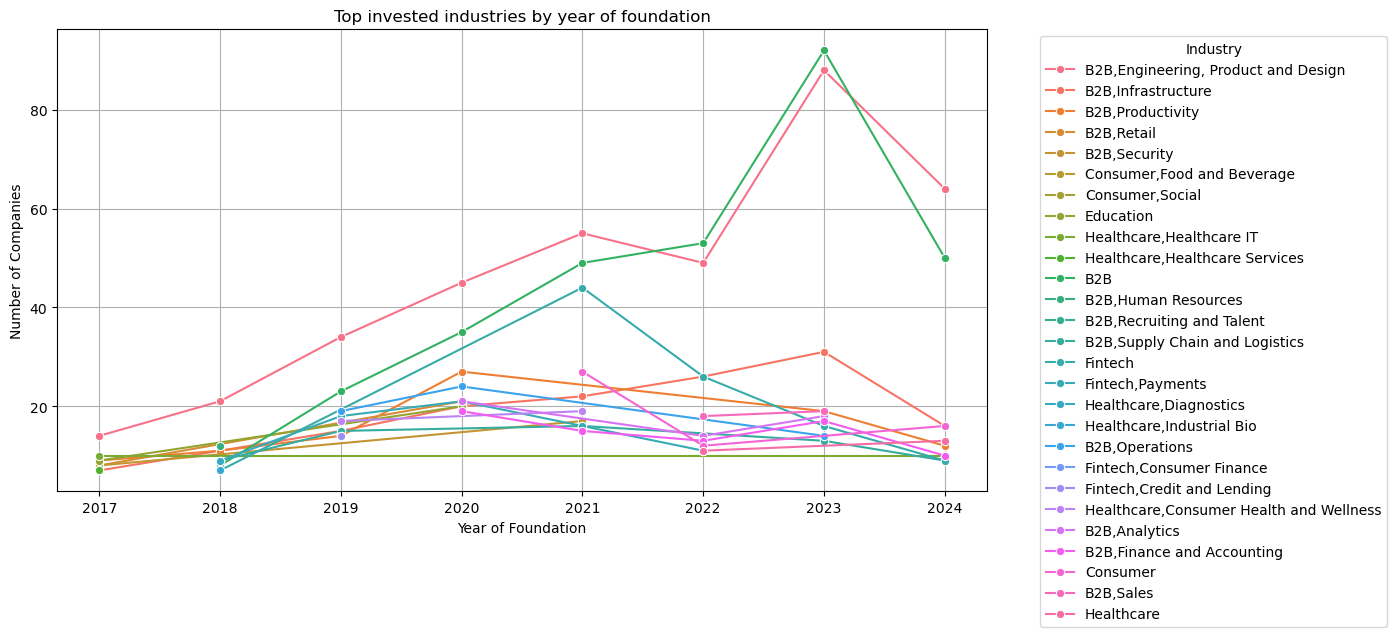

In [17]:
# Graph:

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_industries, x="founded", y="count", hue="industry", marker="o")

plt.xlabel("Year of Foundation")
plt.ylabel("Number of Companies")
plt.title("Top invested industries by year of foundation")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.show()

### 2. What is the top 10 cities that contains the highest amount of founded companies?

In [18]:

top_cities = df["location"].value_counts().head(10)
print(top_cities)

location
San Francisco             1671
New York                   452
London, United Kingdom     130
Bengaluru, India           114
Los Angeles, CA            111
Palo Alto                  103
Mountain View               87
Toronto, Canada             76
Paris, France               58
Boston                      58
Name: count, dtype: int64


### 3. What are the 10 (or close to 10) most successful (status equal Public or Acquired) industries and quantity?

In [19]:

successful_companies = df[df["status"].isin(["Public", "Acquired"])]
successful_industries = successful_companies["industry"].value_counts().head(10)
print(successful_industries)

industry
B2B,Engineering, Product and Design    64
B2B,Infrastructure                     36
B2B,Productivity                       35
Consumer,Home and Personal             29
B2B,Marketing                          28
Consumer,Content                       25
Consumer,Social                        23
Education                              21
B2B,Retail                             20
B2B,Analytics                          18
Name: count, dtype: int64


### 4. What is the average team size of those companies?

In [20]:

average_team_size = successful_companies["team_size"].describe()
print(average_team_size)

count     603.000000
mean      104.001658
std       574.257537
min         0.000000
25%         3.000000
50%        11.000000
75%        38.500000
max      8600.000000
Name: team_size, dtype: float64


### 5. What are the most unsuccessful (status equal Archived) industries?

In [21]:
# Status in the dataset:
unique_status = df["status"].dropna().unique()
num_unique_status = df["status"].nunique()

print("Unique status: ", unique_status)
print("Number of unique status: ", num_unique_status)

Unique status:  ['Active' 'Inactive' 'Acquired' 'Public']
Number of unique status:  4


In [22]:
# Inactive companies:
unsuccessful_industries = df[df["status"] == "Inactive"]["industry"].value_counts()
print(unsuccessful_industries.head(10))

industry
B2B,Engineering, Product and Design        73
Consumer,Social                            57
Education                                  46
Consumer,Home and Personal                 46
B2B,Productivity                           44
B2B,Retail                                 36
Consumer,Content                           35
Consumer,Food and Beverage                 29
B2B,Infrastructure                         29
Healthcare,Consumer Health and Wellness    24
Name: count, dtype: int64


### 6. If you would pick an industry to invest, what industry would be and why?

### 7. If you would pick a Company to invest, what Company would be and why?

Y Combinator runs 4 funding cycles (batches) a year:
- Winter batch (W)
- Summer batch (S)
- Sprint batch (X)
- Fall batch (F)

In [23]:
# batches in the dataset:

unique_batches = df["batch"].dropna().unique()
print(sorted(unique_batches))

['F24', 'IK12', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'W06', 'W07', 'W08', 'W09', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21', 'W22', 'W23', 'W24']


In [24]:
filtered_companies = df[
    (df["batch"] == "F24") &
    (df["industry"] == "B2B,Engineering, Product and Design") &
    (df["location"].isin([
        "San Francisco", "New York", "London, United Kingdom", "Bengaluru, India",
        "Los Angeles, CA", "Palo Alto", "Mountain View", "Toronto, Canada",
        "Paris, France", "Boston"]))
]

filtered_companies_sorted = filtered_companies.sort_values(by="founded", ascending=True)
print(filtered_companies_sorted)

                               active_founders batch  founded  \
4                                Dexter Horthy   F24   2023.0   
8                       Kesav Kosana,Arav Seth   F24   2024.0   
10             Daryl Budiman,Anirudh Ramprasad   F24   2024.0   
29  Tarush Agarwal,Shashij Gupta,Sidhant Kabra   F24   2024.0   
35         Veronica Prilutskaya,Max Prilutskiy   F24   2024.0   
36                  Brandon Chen,James Grugett   F24   2024.0   
40   Manav Bokinala,Victor Cheng,Amir Farahani   F24   2024.0   

                               industry  jobs       location  \
4   B2B,Engineering, Product and Design     0  San Francisco   
8   B2B,Engineering, Product and Design     0  San Francisco   
10  B2B,Engineering, Product and Design     0  San Francisco   
29  B2B,Engineering, Product and Design     0  San Francisco   
35  B2B,Engineering, Product and Design     0  San Francisco   
36  B2B,Engineering, Product and Design     0  San Francisco   
40  B2B,Engineering, Product an